this notebook is for Week6-Assignment
author: Rui Zeng, N15471955, rz2522@nyu.edu
assignment:
[*optional Do Lugano exercise 3 - try at least 3 different bias factors to see how this affects your results.
	- Show the exploration of phi for these different bias factors, what do you notice?
	- What is the smallest you can pick where the barriers are not surmounted?
	- Plot the final Free Energy for each one, does it look the same?*]

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

exercise 3
1. influence of bias factor
2. find lowest bias factor

In [5]:
# load data

# path setting & strides setting
# strides are 1, 3, 10, 20, 50, 100 
settings_biasf_comparison=['1.adp_basinA_biasfactor10_pace500_height1.2_sigma0.55_metad_10ns',
'6.adp_basinA_biasfactor5_pace500_height1.2_sigma0.55_metad_10ns',
'7.adp_basinA_biasfactor15_pace500_height1.2_sigma0.55_metad_10ns',
'8.adp_basinA_biasfactor1_pace500_height1.2_sigma0.55_metad_10ns',
'9.adp_basinA_biasfactor1.5_pace500_height1.2_sigma0.55_metad_10ns',
'10.adp_basinA_biasfactor2.5_pace500_height1.2_sigma0.55_metad_10ns']
biasfs=['10','5','15', '1', '1.5', '2.5']
strides=['1','3','10','20','50','100']

# create matrix to store path
colvar_path_biasf_comparison = np.empty((len(settings_biasf_comparison)), dtype=object)
fes_final_path_biasf_comparison = np.empty((len(settings_biasf_comparison)), dtype=object)
fes_stride_path_biasf_comparison = np.empty((len(settings_biasf_comparison), len(strides)), dtype=object)

# colvar path
for i in range(len(settings_biasf_comparison)):
    colvar_path_biasf_comparison[i] = '../Data/'+settings_biasf_comparison[i]+'/'+settings_biasf_comparison[i]+'.colvar.txt'
    i += 1
#print (colvar_path_biasf_comparison)
# final fes path
for i in range(len(settings_biasf_comparison)):
    fes_final_path_biasf_comparison[i] = '../Data/'+settings_biasf_comparison[i]+'/'+settings_biasf_comparison[i]+'.fes.dat'
    i += 1
#print (fes_final_path_biasf_comparison)
# stride fes path
for i in range(len(settings_biasf_comparison)):
    for j in range(len(strides)):
        fes_stride_path_biasf_comparison[i][j] = '../Data/'+settings_biasf_comparison[i]+'/stride_hills/fes.dat'+strides[j]+'.dat'
        j += 1
    i += 1
#print (fes_stride_path_biasf_comparison)

# create matrix to store data
colvar_biasf_comparison = np.empty((len(settings_biasf_comparison)), dtype=object)
fes_final_biasf_comparison = np.empty((len(settings_biasf_comparison)), dtype=object)
fes_stride_biasf_comparison = np.empty((len(settings_biasf_comparison), len(strides)), dtype=object)


# load colvar data
for i in range(len(settings_biasf_comparison)):
    colvar_biasf_comparison[i] = np.loadtxt(colvar_path_biasf_comparison[i], skiprows=1)
    i += 1
# load final fes data
for i in range(len(settings_biasf_comparison)):
    fes_final_biasf_comparison[i] = np.loadtxt(fes_final_path_biasf_comparison[i], skiprows=1)
    i += 1
# load stride fes data
for i in range(len(settings_biasf_comparison)):
    for j in range(len(strides)):
        fes_stride_biasf_comparison[i][j] = np.loadtxt(fes_stride_path_biasf_comparison[i][j], skiprows=1)
        j += 1
    i += 1

# check data
print (colvar_biasf_comparison[0].shape)
print (fes_final_biasf_comparison[0].shape)
print (fes_stride_biasf_comparison[0][0].shape)

(500001, 4)
(33, 3)
(33, 3)


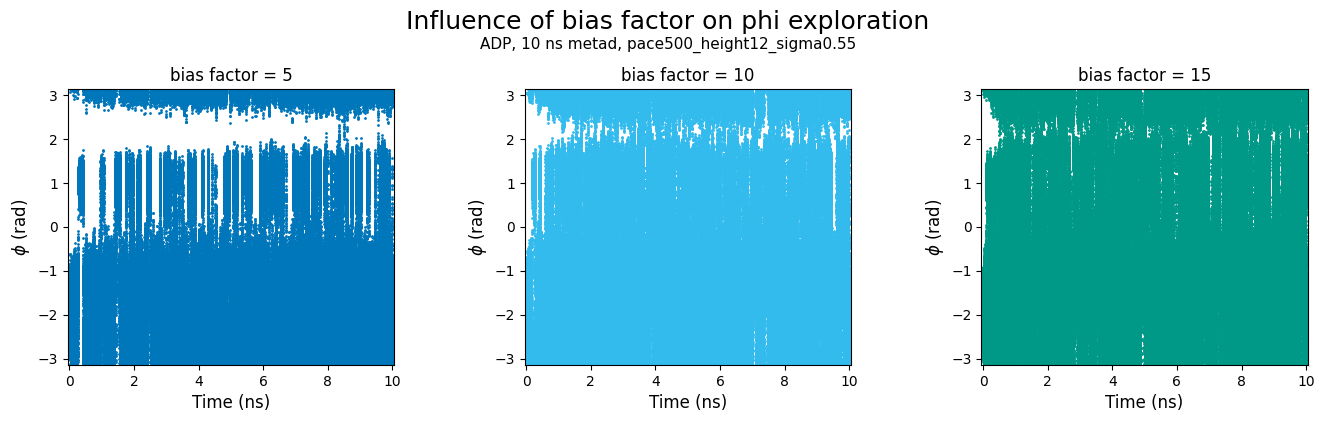

In [11]:
# figure 12 - exploration of phi
fig,axs=plt.subplots(1,3,figsize=(16,4))

# set colorblind-friendly palatte 
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']

# biasf = 5
axs[0].scatter(colvar_biasf_comparison[1][:,0]/1000,colvar_biasf_comparison[1][:,1],color=colors[0],s=1)
# set axis range
axs[0].set_xlim(-0.05,10.05)
axs[0].set_ylim(-np.pi, np.pi)
# labels, font size 12
axs[0].set_xlabel('Time (ns)', fontsize=12)
axs[0].set_ylabel(r'$\phi$ (rad)', fontsize=12)
# title
axs[0].set_title('bias factor = 5')

# biasf = 10
axs[1].scatter(colvar_biasf_comparison[0][:,0]/1000,colvar_biasf_comparison[0][:,1],color=colors[1],s=1)
# set axis range
axs[1].set_xlim(-0.05,10.05)
axs[1].set_ylim(-np.pi, np.pi)
# labels, font size 12
axs[1].set_xlabel('Time (ns)', fontsize=12)
axs[1].set_ylabel(r'$\phi$ (rad)', fontsize=12)
# title
axs[1].set_title('bias factor = 10')

# biasf = 15
axs[2].scatter(colvar_biasf_comparison[2][:,0]/1000,colvar_biasf_comparison[2][:,1],color=colors[2],s=1)
# set axis range
axs[2].set_xlim(-0.05,10.05)
axs[2].set_ylim(-np.pi, np.pi)
# labels, font size 12
axs[2].set_xlabel('Time (ns)', fontsize=12)
axs[2].set_ylabel(r'$\phi$ (rad)', fontsize=12)
# title
axs[2].set_title('bias factor = 15')

# title
plt.text(x=0.5, y=0.95, s="Influence of bias factor on phi exploration", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.9, s= "ADP, 10 ns metad, pace500_height12_sigma0.55", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.4)

# save figure as pdf in ../Figures
fname = '../Figures/fig12.[metad_10ns_topolA]Influence_of_bias_factor_on_phi_exploration.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

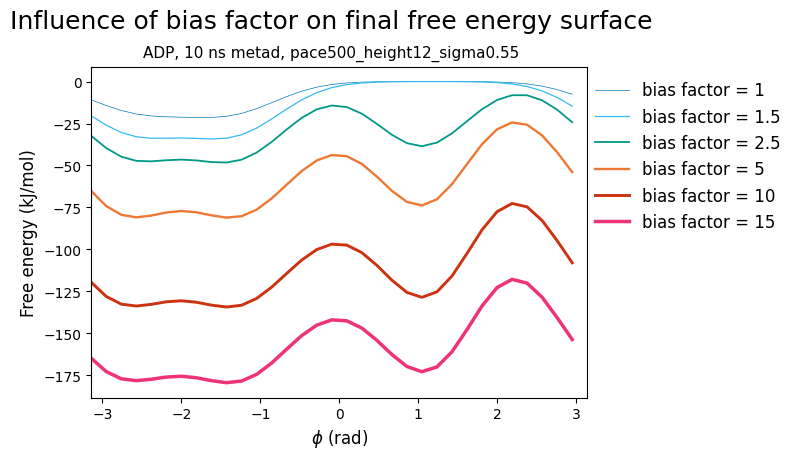

In [30]:
# figure 13 - final fes
fig = plt.figure(13)
from scipy.interpolate import make_interp_spline

# data processing
# biasf is 10, 5, 15, 1, 1.5, 2.5
# smooth fes
# create matrix for smoothing
xnews = np.empty((6), dtype=object)
spls = np.empty((6), dtype=object)
fes_smooths = np.empty((6), dtype=object)
# smooth fes
for i in range(6):
    xnews[i] = np.linspace(fes_final_biasf_comparison[i][:,0].min(), fes_final_biasf_comparison[i][:,0].max(), 300)
    spls[i] = make_interp_spline(fes_final_biasf_comparison[i][:,0], fes_final_biasf_comparison[i][:,1], k=3)
    fes_smooths[i] = spls[i](xnews[i])
    i += 1

# check path of data
#print(fes_final_path_biasf_comparison)

# set colorblind-friendly palatte
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# create linewidth list, min 0.5, max 2.5
lwidths = np.linspace(0.5,2.5,6)

# plot fes over phi, colorblind friendly, from low to high biasf
# biasf = 1
plt.plot(fes_final_biasf_comparison[3][:,0],fes_final_biasf_comparison[3][:,1],color=colors[0],linewidth=lwidths[0], label='bias factor = 1')
# biasf = 1.5
plt.plot(fes_final_biasf_comparison[4][:,0],fes_final_biasf_comparison[4][:,1],color=colors[1],linewidth=lwidths[1], label='bias factor = 1.5')
# biasf = 2.5
plt.plot(fes_final_biasf_comparison[5][:,0],fes_final_biasf_comparison[5][:,1],color=colors[2],linewidth=lwidths[2], label='bias factor = 2.5')
# biasf = 5
plt.plot(fes_final_biasf_comparison[1][:,0],fes_final_biasf_comparison[1][:,1],color=colors[3],linewidth=lwidths[3], label='bias factor = 5')
# biasf = 10
plt.plot(fes_final_biasf_comparison[0][:,0],fes_final_biasf_comparison[0][:,1],color=colors[4],linewidth=lwidths[4], label='bias factor = 10')
# biasf = 15
plt.plot(fes_final_biasf_comparison[2][:,0],fes_final_biasf_comparison[2][:,1],color=colors[5],linewidth=lwidths[5], label='bias factor = 15')

# set axis range
plt.xlim(-np.pi, np.pi)
# labels, fontsize 12
plt.xlabel(r'$\phi$ (rad)', fontsize=12)
plt.ylabel('Free energy (kJ/mol)', fontsize=12)
# legend
plt.legend(loc='upper right', fontsize=12, frameon=False, bbox_to_anchor=(1.42, 1))

# two lines of title
plt.text(x=0.5, y=0.88, s="Influence of bias factor on final free energy surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "ADP, 10 ns metad, pace500_height12_sigma0.55", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig13.[metad_10ns_topolA]Influence_of_bias_factor_on_final_free_energy_surface.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


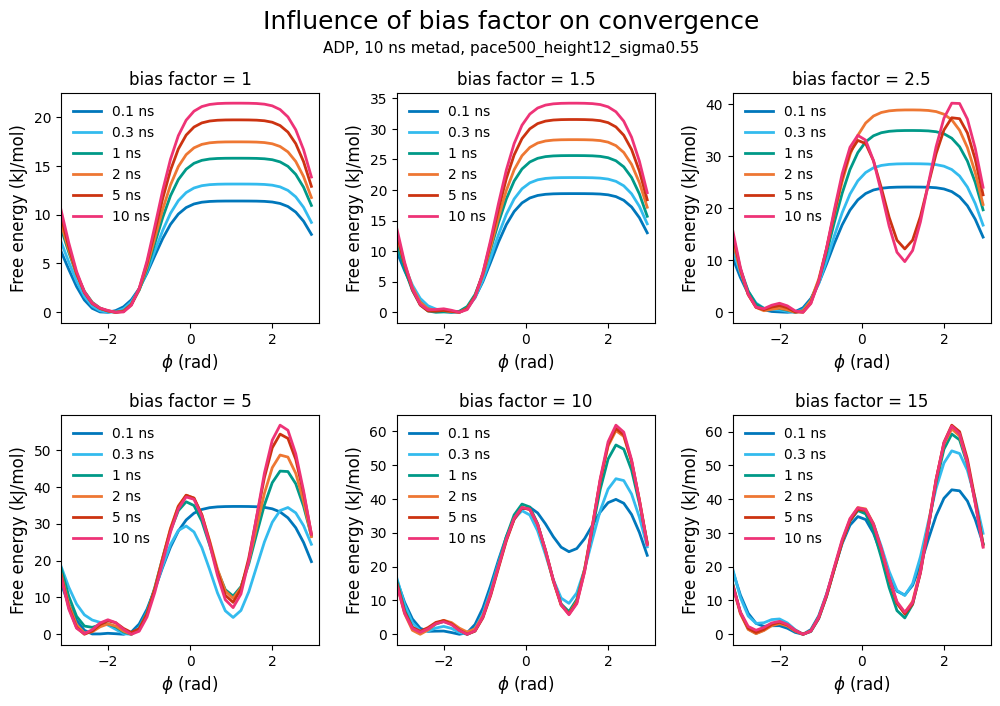

In [41]:
# figure 14 - influence of biasf - time evolution of fes
fig,axs = plt.subplots(2,3,figsize=(12,8))
from scipy.interpolate import make_interp_spline

# data processing
# biasf is 10, 5, 15, 1, 1.5, 2.5
# create matrix for smoothing
xnews = np.empty((6, 6), dtype=object)
spls = np.empty((6, 6), dtype=object)
fes_smooths = np.empty((6, 6), dtype=object)
# smooth fes
for i in range(3):
    for j in range(6):
        xnews[i][j] = np.linspace(fes_stride_biasf_comparison[i][j][:,0].min(), fes_stride_biasf_comparison[i][j][:,0].max(), 300)
        spls[i][j] = make_interp_spline(fes_stride_biasf_comparison[i][j][:,0], fes_stride_biasf_comparison[i][j][:,1], k=3)
        fes_smooths[i][j] = spls[i][j](xnews[i][j])
        j += 1
    i += 1

# check path of data
#print(fes_stride_path_sigma_comparison)

# set colorblind-friendly palatte
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']

# plot for biasf = 1
axs[0,0].plot(fes_stride_biasf_comparison[3][0][:,0],fes_stride_biasf_comparison[3][0][:,1],color=colors[0],linewidth=2, label='0.1 ns')
axs[0,0].plot(fes_stride_biasf_comparison[3][1][:,0],fes_stride_biasf_comparison[3][1][:,1],color=colors[1],linewidth=2, label='0.3 ns')
axs[0,0].plot(fes_stride_biasf_comparison[3][2][:,0],fes_stride_biasf_comparison[3][2][:,1],color=colors[2],linewidth=2, label='1 ns')
axs[0,0].plot(fes_stride_biasf_comparison[3][3][:,0],fes_stride_biasf_comparison[3][3][:,1],color=colors[3],linewidth=2, label='2 ns')
axs[0,0].plot(fes_stride_biasf_comparison[3][4][:,0],fes_stride_biasf_comparison[3][4][:,1],color=colors[4],linewidth=2, label='5 ns')
axs[0,0].plot(fes_stride_biasf_comparison[3][5][:,0],fes_stride_biasf_comparison[3][5][:,1],color=colors[5],linewidth=2, label='10 ns')
# set axis range
axs[0,0].set_xlim(-np.pi, np.pi)
# labels, fontsize 12
axs[0,0].set_xlabel(r'$\phi$ (rad)', fontsize=12)
axs[0,0].set_ylabel('Free energy (kJ/mol)', fontsize=12)
# legend
axs[0,0].legend(loc='upper left', fontsize=10, frameon=False)
# title
axs[0,0].set_title('bias factor = 1', fontsize=12)

# plot for biasf = 1.5
axs[0,1].plot(fes_stride_biasf_comparison[4][0][:,0],fes_stride_biasf_comparison[4][0][:,1],color=colors[0],linewidth=2, label='0.1 ns')
axs[0,1].plot(fes_stride_biasf_comparison[4][1][:,0],fes_stride_biasf_comparison[4][1][:,1],color=colors[1],linewidth=2, label='0.3 ns')
axs[0,1].plot(fes_stride_biasf_comparison[4][2][:,0],fes_stride_biasf_comparison[4][2][:,1],color=colors[2],linewidth=2, label='1 ns')
axs[0,1].plot(fes_stride_biasf_comparison[4][3][:,0],fes_stride_biasf_comparison[4][3][:,1],color=colors[3],linewidth=2, label='2 ns')
axs[0,1].plot(fes_stride_biasf_comparison[4][4][:,0],fes_stride_biasf_comparison[4][4][:,1],color=colors[4],linewidth=2, label='5 ns')
axs[0,1].plot(fes_stride_biasf_comparison[4][5][:,0],fes_stride_biasf_comparison[4][5][:,1],color=colors[5],linewidth=2, label='10 ns')
# set axis range
axs[0,1].set_xlim(-np.pi, np.pi)
# labels, fontsize 12
axs[0,1].set_xlabel(r'$\phi$ (rad)', fontsize=12)
axs[0,1].set_ylabel('Free energy (kJ/mol)', fontsize=12)
# legend
axs[0,1].legend(loc='upper left', fontsize=10, frameon=False)
# title
axs[0,1].set_title('bias factor = 1.5', fontsize=12)

# plot for biasf = 2.5
axs[0,2].plot(fes_stride_biasf_comparison[5][0][:,0],fes_stride_biasf_comparison[5][0][:,1],color=colors[0],linewidth=2, label='0.1 ns')
axs[0,2].plot(fes_stride_biasf_comparison[5][1][:,0],fes_stride_biasf_comparison[5][1][:,1],color=colors[1],linewidth=2, label='0.3 ns')
axs[0,2].plot(fes_stride_biasf_comparison[5][2][:,0],fes_stride_biasf_comparison[5][2][:,1],color=colors[2],linewidth=2, label='1 ns')
axs[0,2].plot(fes_stride_biasf_comparison[5][3][:,0],fes_stride_biasf_comparison[5][3][:,1],color=colors[3],linewidth=2, label='2 ns')
axs[0,2].plot(fes_stride_biasf_comparison[5][4][:,0],fes_stride_biasf_comparison[5][4][:,1],color=colors[4],linewidth=2, label='5 ns')
axs[0,2].plot(fes_stride_biasf_comparison[5][5][:,0],fes_stride_biasf_comparison[5][5][:,1],color=colors[5],linewidth=2, label='10 ns')
# set axis range
axs[0,2].set_xlim(-np.pi, np.pi)
# labels, fontsize 12
axs[0,2].set_xlabel(r'$\phi$ (rad)', fontsize=12)
axs[0,2].set_ylabel('Free energy (kJ/mol)', fontsize=12)
# legend
axs[0,2].legend(loc='upper left', fontsize=10, frameon=False)
# title
axs[0,2].set_title('bias factor = 2.5', fontsize=12)

# plot for biasf = 5
axs[1,0].plot(fes_stride_biasf_comparison[1][0][:,0],fes_stride_biasf_comparison[1][0][:,1],color=colors[0],linewidth=2, label='0.1 ns')
axs[1,0].plot(fes_stride_biasf_comparison[1][1][:,0],fes_stride_biasf_comparison[1][1][:,1],color=colors[1],linewidth=2, label='0.3 ns')
axs[1,0].plot(fes_stride_biasf_comparison[1][2][:,0],fes_stride_biasf_comparison[1][2][:,1],color=colors[2],linewidth=2, label='1 ns')
axs[1,0].plot(fes_stride_biasf_comparison[1][3][:,0],fes_stride_biasf_comparison[1][3][:,1],color=colors[3],linewidth=2, label='2 ns')
axs[1,0].plot(fes_stride_biasf_comparison[1][4][:,0],fes_stride_biasf_comparison[1][4][:,1],color=colors[4],linewidth=2, label='5 ns')
axs[1,0].plot(fes_stride_biasf_comparison[1][5][:,0],fes_stride_biasf_comparison[1][5][:,1],color=colors[5],linewidth=2, label='10 ns')
# set axis range
axs[1,0].set_xlim(-np.pi, np.pi)
# labels, fontsize 12
axs[1,0].set_xlabel(r'$\phi$ (rad)', fontsize=12)
axs[1,0].set_ylabel('Free energy (kJ/mol)', fontsize=12)
# legend
axs[1,0].legend(loc='upper left', fontsize=10, frameon=False)
# title
axs[1,0].set_title('bias factor = 5', fontsize=12)

# plot for biasf = 10
axs[1,1].plot(fes_stride_biasf_comparison[0][0][:,0],fes_stride_biasf_comparison[0][0][:,1],color=colors[0],linewidth=2, label='0.1 ns')
axs[1,1].plot(fes_stride_biasf_comparison[0][1][:,0],fes_stride_biasf_comparison[0][1][:,1],color=colors[1],linewidth=2, label='0.3 ns')
axs[1,1].plot(fes_stride_biasf_comparison[0][2][:,0],fes_stride_biasf_comparison[0][2][:,1],color=colors[2],linewidth=2, label='1 ns')
axs[1,1].plot(fes_stride_biasf_comparison[0][3][:,0],fes_stride_biasf_comparison[0][3][:,1],color=colors[3],linewidth=2, label='2 ns')
axs[1,1].plot(fes_stride_biasf_comparison[0][4][:,0],fes_stride_biasf_comparison[0][4][:,1],color=colors[4],linewidth=2, label='5 ns')
axs[1,1].plot(fes_stride_biasf_comparison[0][5][:,0],fes_stride_biasf_comparison[0][5][:,1],color=colors[5],linewidth=2, label='10 ns')
# set axis range
axs[1,1].set_xlim(-np.pi, np.pi)
# labels, fontsize 12
axs[1,1].set_xlabel(r'$\phi$ (rad)', fontsize=12)
axs[1,1].set_ylabel('Free energy (kJ/mol)', fontsize=12)
# legend
axs[1,1].legend(loc='upper left', fontsize=10, frameon=False)
# title
axs[1,1].set_title('bias factor = 10', fontsize=12)

# plot for biasf = 15
axs[1,2].plot(fes_stride_biasf_comparison[2][0][:,0],fes_stride_biasf_comparison[2][0][:,1],color=colors[0],linewidth=2, label='0.1 ns')
axs[1,2].plot(fes_stride_biasf_comparison[2][1][:,0],fes_stride_biasf_comparison[2][1][:,1],color=colors[1],linewidth=2, label='0.3 ns')
axs[1,2].plot(fes_stride_biasf_comparison[2][2][:,0],fes_stride_biasf_comparison[2][2][:,1],color=colors[2],linewidth=2, label='1 ns')
axs[1,2].plot(fes_stride_biasf_comparison[2][3][:,0],fes_stride_biasf_comparison[2][3][:,1],color=colors[3],linewidth=2, label='2 ns')
axs[1,2].plot(fes_stride_biasf_comparison[2][4][:,0],fes_stride_biasf_comparison[2][4][:,1],color=colors[4],linewidth=2, label='5 ns')
axs[1,2].plot(fes_stride_biasf_comparison[2][5][:,0],fes_stride_biasf_comparison[2][5][:,1],color=colors[5],linewidth=2, label='10 ns')
# set axis range
axs[1,2].set_xlim(-np.pi, np.pi)
# labels, fontsize 12
axs[1,2].set_xlabel(r'$\phi$ (rad)', fontsize=12)
axs[1,2].set_ylabel('Free energy (kJ/mol)', fontsize=12)
# legend
axs[1,2].legend(loc='upper left', fontsize=10, frameon=False)
# title
axs[1,2].set_title('bias factor = 15', fontsize=12)

# title
plt.text(x=0.5, y=0.88, s="Influence of bias factor on convergence", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.85, s= "ADP, 10 ns metad, pace500_height12_sigma0.55", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3, hspace=0.4)

# save figure as pdf in ../Figures
fname = '../Figures/fig14.[metad_10ns_topolA]Influence_of_bias_factor_on_convergence.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

